Aluno: Giovanni Bruno Travassos de Carvalho - 11506849

Resolução da terceira questão da primeira lista de exercícios de Deep Learning

Professor: Tiago Maritan 

## Questão 3

Considere um problema de classificação de padrões constituído de oito padrões. A
distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no
círculo um losango também centrado na origem e com lados iguais a raiz de 2. Os dados das
classe C1, C2, C3, C4 corresponde aos quatro setores do losango e as outras quatro classes
correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar
aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando
o conjunto de validação e calculando a matriz de confusão.


### Primeira Etapa: Geração de Dados 

Criarei duas funções: uma para gerar Losangos e outra para Arestas. 

In [1]:
import numpy as np
import random

def GerarLosangos(data_size, quadrante):
  pontos = []
  for _ in range(data_size):
    if quadrante == 0:
      x = random.uniform(0,1)
      y = random.uniform(0,1-x)
      pontos.append([x,y,quadrante])

    if quadrante == 1:
      x = random.uniform(-1,0)
      y = random.uniform(0,x+1)
      pontos.append([x,y,quadrante])

    if quadrante == 2:
      x = random.uniform(0,1)
      y = random.uniform(-1+x, 0)
      pontos.append([x,y,quadrante])

    if quadrante == 3:
      x = random.uniform(-1,0)
      y = random.uniform(-1-x, 0)
      pontos.append([x,y,quadrante])

  return pontos

def GerarArestas(data_size, quadrante):
  pontos = []

  for _ in range(data_size):

    if quadrante == 0:
      x = random.uniform(0,1)
      y = random.uniform(1-x, np.sqrt(1 - x**2))
      pontos.append([x,y,quadrante+4])

    if quadrante == 1:
      x = random.uniform(-1,0)
      y = random.uniform(1+x, np.sqrt(1 - x**2))
      pontos.append([x,y,quadrante+4])    

    if quadrante == 2:
      x = random.uniform(-1,0)
      y = random.uniform(-np.sqrt(1 - x**2), -1 - x)
      pontos.append([x,y,quadrante+4])        

    if quadrante == 3:
      x = random.uniform(0,1)
      y = random.uniform(-np.sqrt(1 - x**2), -1 + x)
      pontos.append([x,y,quadrante+4])    

  return pontos

In [ ]:
# Importando Bibliotecas: 

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [3]:
# Gerando dados usando as funções criadas: 

quadrantes = [0,1,2,3]
treino = []
teste = []

for quadrantes in quadrantes: 
    treino.extend(GerarLosangos(800, quadrantes))
    teste.extend(GerarLosangos(200, quadrantes))
    treino.extend(GerarArestas(800, quadrantes))
    teste.extend(GerarArestas(200, quadrantes))
    
treino = np.array(treino)
teste = np.array(teste)

In [4]:
print(treino)

[[ 0.89954356  0.02479988  0.        ]
 [ 0.49617268  0.21144258  0.        ]
 [ 0.82154892  0.15867507  0.        ]
 ...
 [ 0.27386638 -0.76445025  7.        ]
 [ 0.05115086 -0.96634934  7.        ]
 [ 0.10422231 -0.96898967  7.        ]]


In [6]:
treino.shape

(6400, 3)

In [7]:
teste.shape

(1600, 3)

In [5]:
print(teste)

[[ 0.93396438  0.02602967  0.        ]
 [ 0.32499624  0.10754906  0.        ]
 [ 0.84242817  0.09154288  0.        ]
 ...
 [ 0.01732253 -0.99474303  7.        ]
 [ 0.36377636 -0.68298303  7.        ]
 [ 0.29249749 -0.94889216  7.        ]]


In [7]:
# Dividindo entrada e saída: 
X_Treino = treino[:,[0,1]]
Y_Treino = treino[:,2]
X_Teste = teste[:,[0,1]]
Y_Teste = teste[:,2]

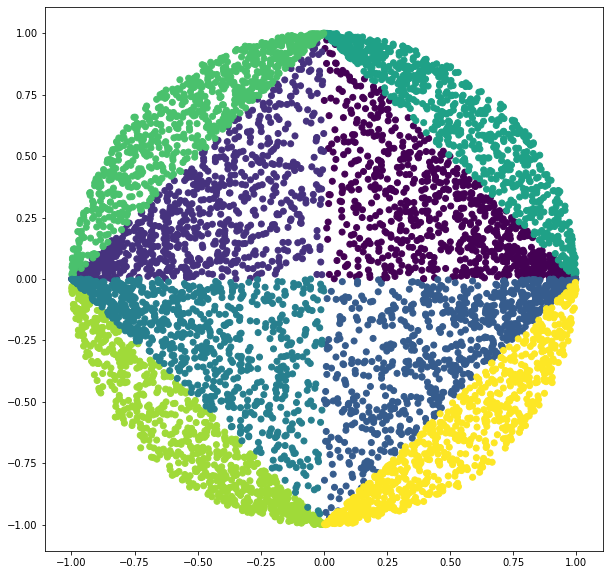

In [8]:
# Visualizando dados de Treino: 
plt.figure(figsize=(10,10))
plt.scatter(X_Treino[:,0], X_Treino[:,1], c=Y_Treino)
plt.show()

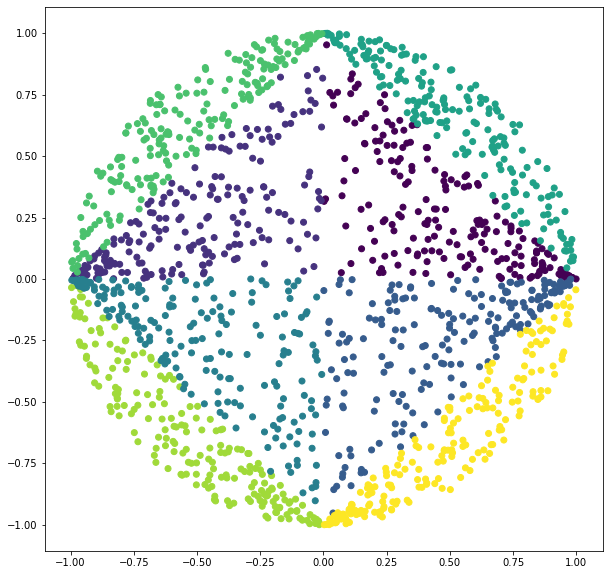

In [9]:
# Visualizando dados de Teste: 
plt.figure(figsize=(10,10))
plt.scatter(X_Teste[:,0], X_Teste[:,1], c = Y_Teste)
plt.show()

In [12]:
# Criando a Rede Neural: 

classificador = Sequential() # Inicialização
classificador.add(Dense(units = 12, activation = 'relu', input_dim = 2)) # Camada de Entrada
#classificador.add(Dropout(0.2))
classificador.add(Dense(units = 12, activation = 'relu')) # Camada oculta
classificador.add(Dense(units = 8, activation = 'softmax')) # Camada de Saída 

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Compilando a Rede Neural: 
classificador.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# Treinando a Rede Neural: 
T = classificador.fit(X_Treino, Y_Treino, validation_split = 0.2, batch_size=32, epochs = 100)

Train on 5120 samples, validate on 1280 samples
Epoch 1/100
5120/5120 [==============================] - 1s 107us/step - loss: 1.8261 - accuracy: 0.3750 - val_loss: 3.7708 - val_accuracy: 0.0000e+00
Epoch 2/100
5120/5120 [==============================] - 0s 58us/step - loss: 1.2607 - accuracy: 0.5574 - val_loss: 5.4939 - val_accuracy: 0.0000e+00
Epoch 3/100
5120/5120 [==============================] - 0s 49us/step - loss: 0.8891 - accuracy: 0.6916 - val_loss: 6.6913 - val_accuracy: 0.0000e+00
Epoch 4/100
5120/5120 [==============================] - 0s 49us/step - loss: 0.7167 - accuracy: 0.7443 - val_loss: 7.7975 - val_accuracy: 0.0000e+00
Epoch 5/100
5120/5120 [==============================] - 0s 45us/step - loss: 0.6177 - accuracy: 0.7760 - val_loss: 8.8465 - val_accuracy: 0.0031
Epoch 6/100
5120/5120 [==============================] - 0s 48us/step - loss: 0.5400 - accuracy: 0.8141 - val_loss: 9.5294 - val_accuracy: 0.0250
Epoch 7/100
5120/5120 [==============================] - 0s

In [15]:
# Fazendo previsões com a Rede: 

previsoes = classificador.predict(X_Teste)
print(previsoes)

[[9.99998927e-01 1.07463097e-06 2.87735116e-08 ... 1.46356437e-35
  5.22578427e-31 1.47251898e-20]
 [9.90635097e-01 4.98604948e-07 4.26646609e-20 ... 1.20274596e-21
  0.00000000e+00 1.00266834e-22]
 [6.90982163e-01 2.45582753e-14 1.61636040e-01 ... 0.00000000e+00
  1.89566648e-24 8.14412236e-23]
 ...
 [1.39008052e-05 3.17403968e-20 9.99986053e-01 ... 0.00000000e+00
  1.95161999e-24 4.10073688e-26]
 [7.07128515e-17 8.46910202e-31 1.00000000e+00 ... 0.00000000e+00
  6.62803629e-21 7.61372040e-32]
 [2.99861308e-12 4.85870081e-25 1.00000000e+00 ... 0.00000000e+00
  3.19879831e-26 6.79523455e-30]]


In [16]:
# Calculando a Acurácia: 

acuracia = accuracy_score(Y_Teste, np.argmax(previsoes, axis=1))
print(acuracia)

0.85375


Foi obtida uma acurácia de 85%.

In [17]:
# Criando a matriz de confusão: 

confusao = confusion_matrix(Y_Teste, np.argmax(previsoes, axis=1))
print(confusao)

[[191   2   2   0   5   0   0   0]
 [  0 199   0   0   0   1   0   0]
 [  2   0 197   1   0   0   0   0]
 [  0  10   1 181   0   0   8   0]
 [  0   0   0   0 200   0   0   0]
 [  0   1   0   0   0 199   0   0]
 [  0   0   0   1   0   0 199   0]
 [  0   0 196   0   0   0   4   0]]
